In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('parkinsons.data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [134]:
data=pd.read_csv("parkinsons.data")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [135]:
data.shape

(195, 24)

In [136]:
data.status

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [138]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [139]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [140]:
data.duplicated().sum()

0

In [141]:
data_copy=data
X=data_copy.drop(['name','status'],axis=1)
y=data_copy["status"]

In [142]:
X.skew().sort_values()

HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread2             0.144430
D2                  0.430384
spread1             0.432139
MDVP:Fo(Hz)         0.591737
PPE                 0.797491
MDVP:Flo(Hz)        1.217350
Shimmer:APQ3        1.580576
Shimmer:DDA         1.580618
MDVP:Shimmer        1.666480
Shimmer:APQ5        1.798697
MDVP:Shimmer(dB)    1.999389
MDVP:Fhi(Hz)        2.542146
MDVP:APQ            2.618047
MDVP:Jitter(Abs)    2.649071
MDVP:PPQ            3.073892
MDVP:Jitter(%)      3.084946
MDVP:RAP            3.360708
Jitter:DDP          3.362058
NHR                 4.220709
dtype: float64

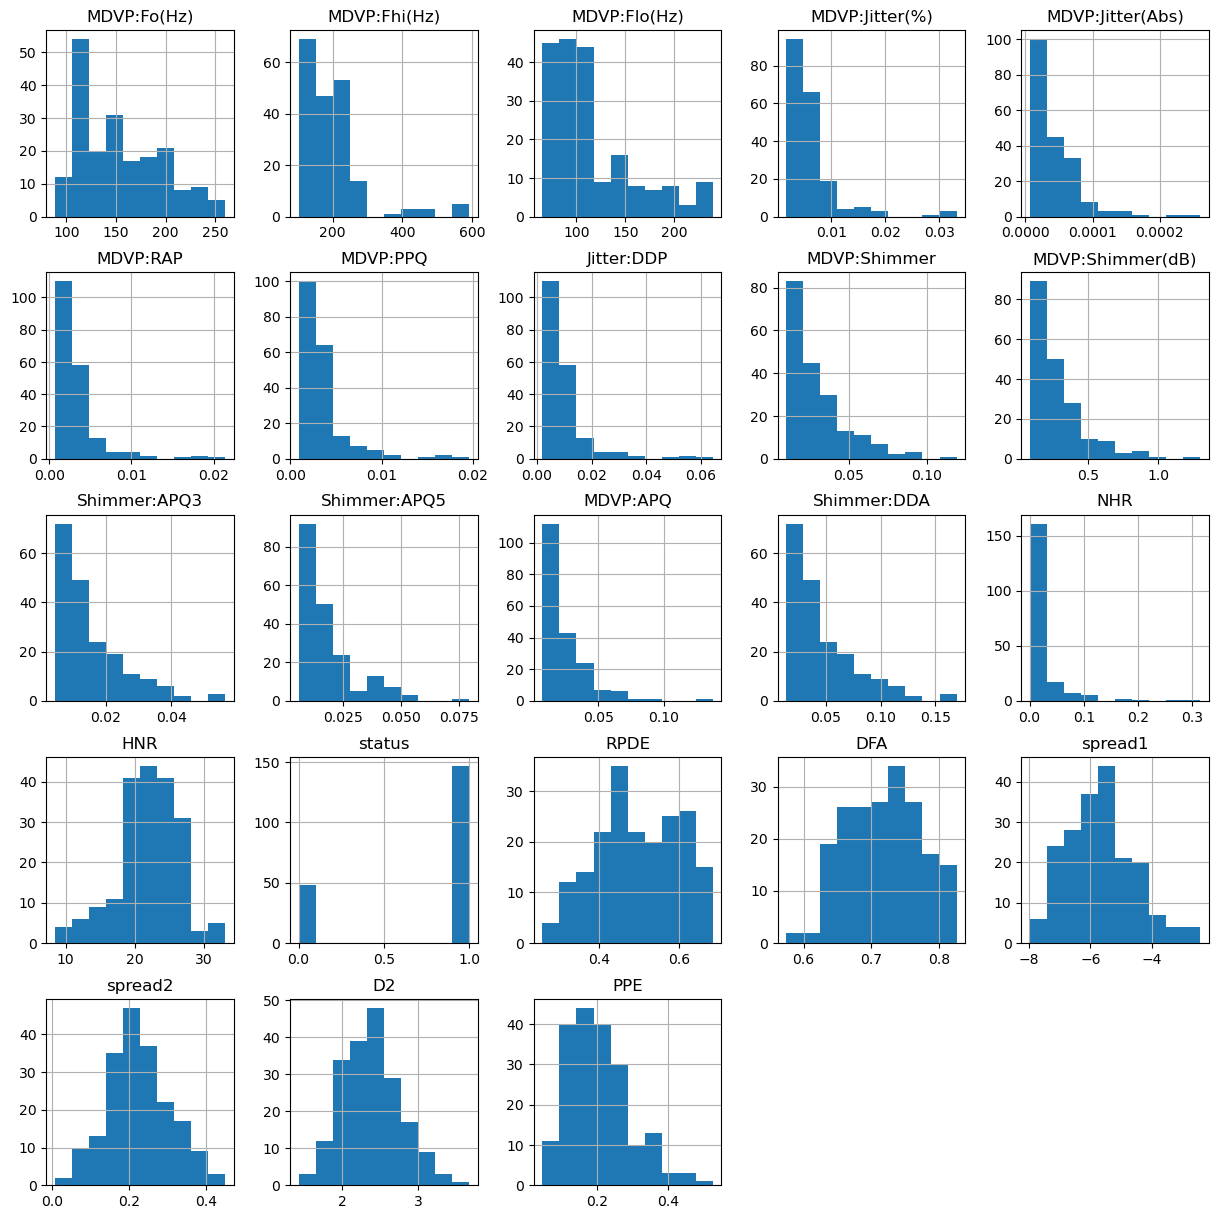

In [143]:
data.hist(figsize=(15,15));

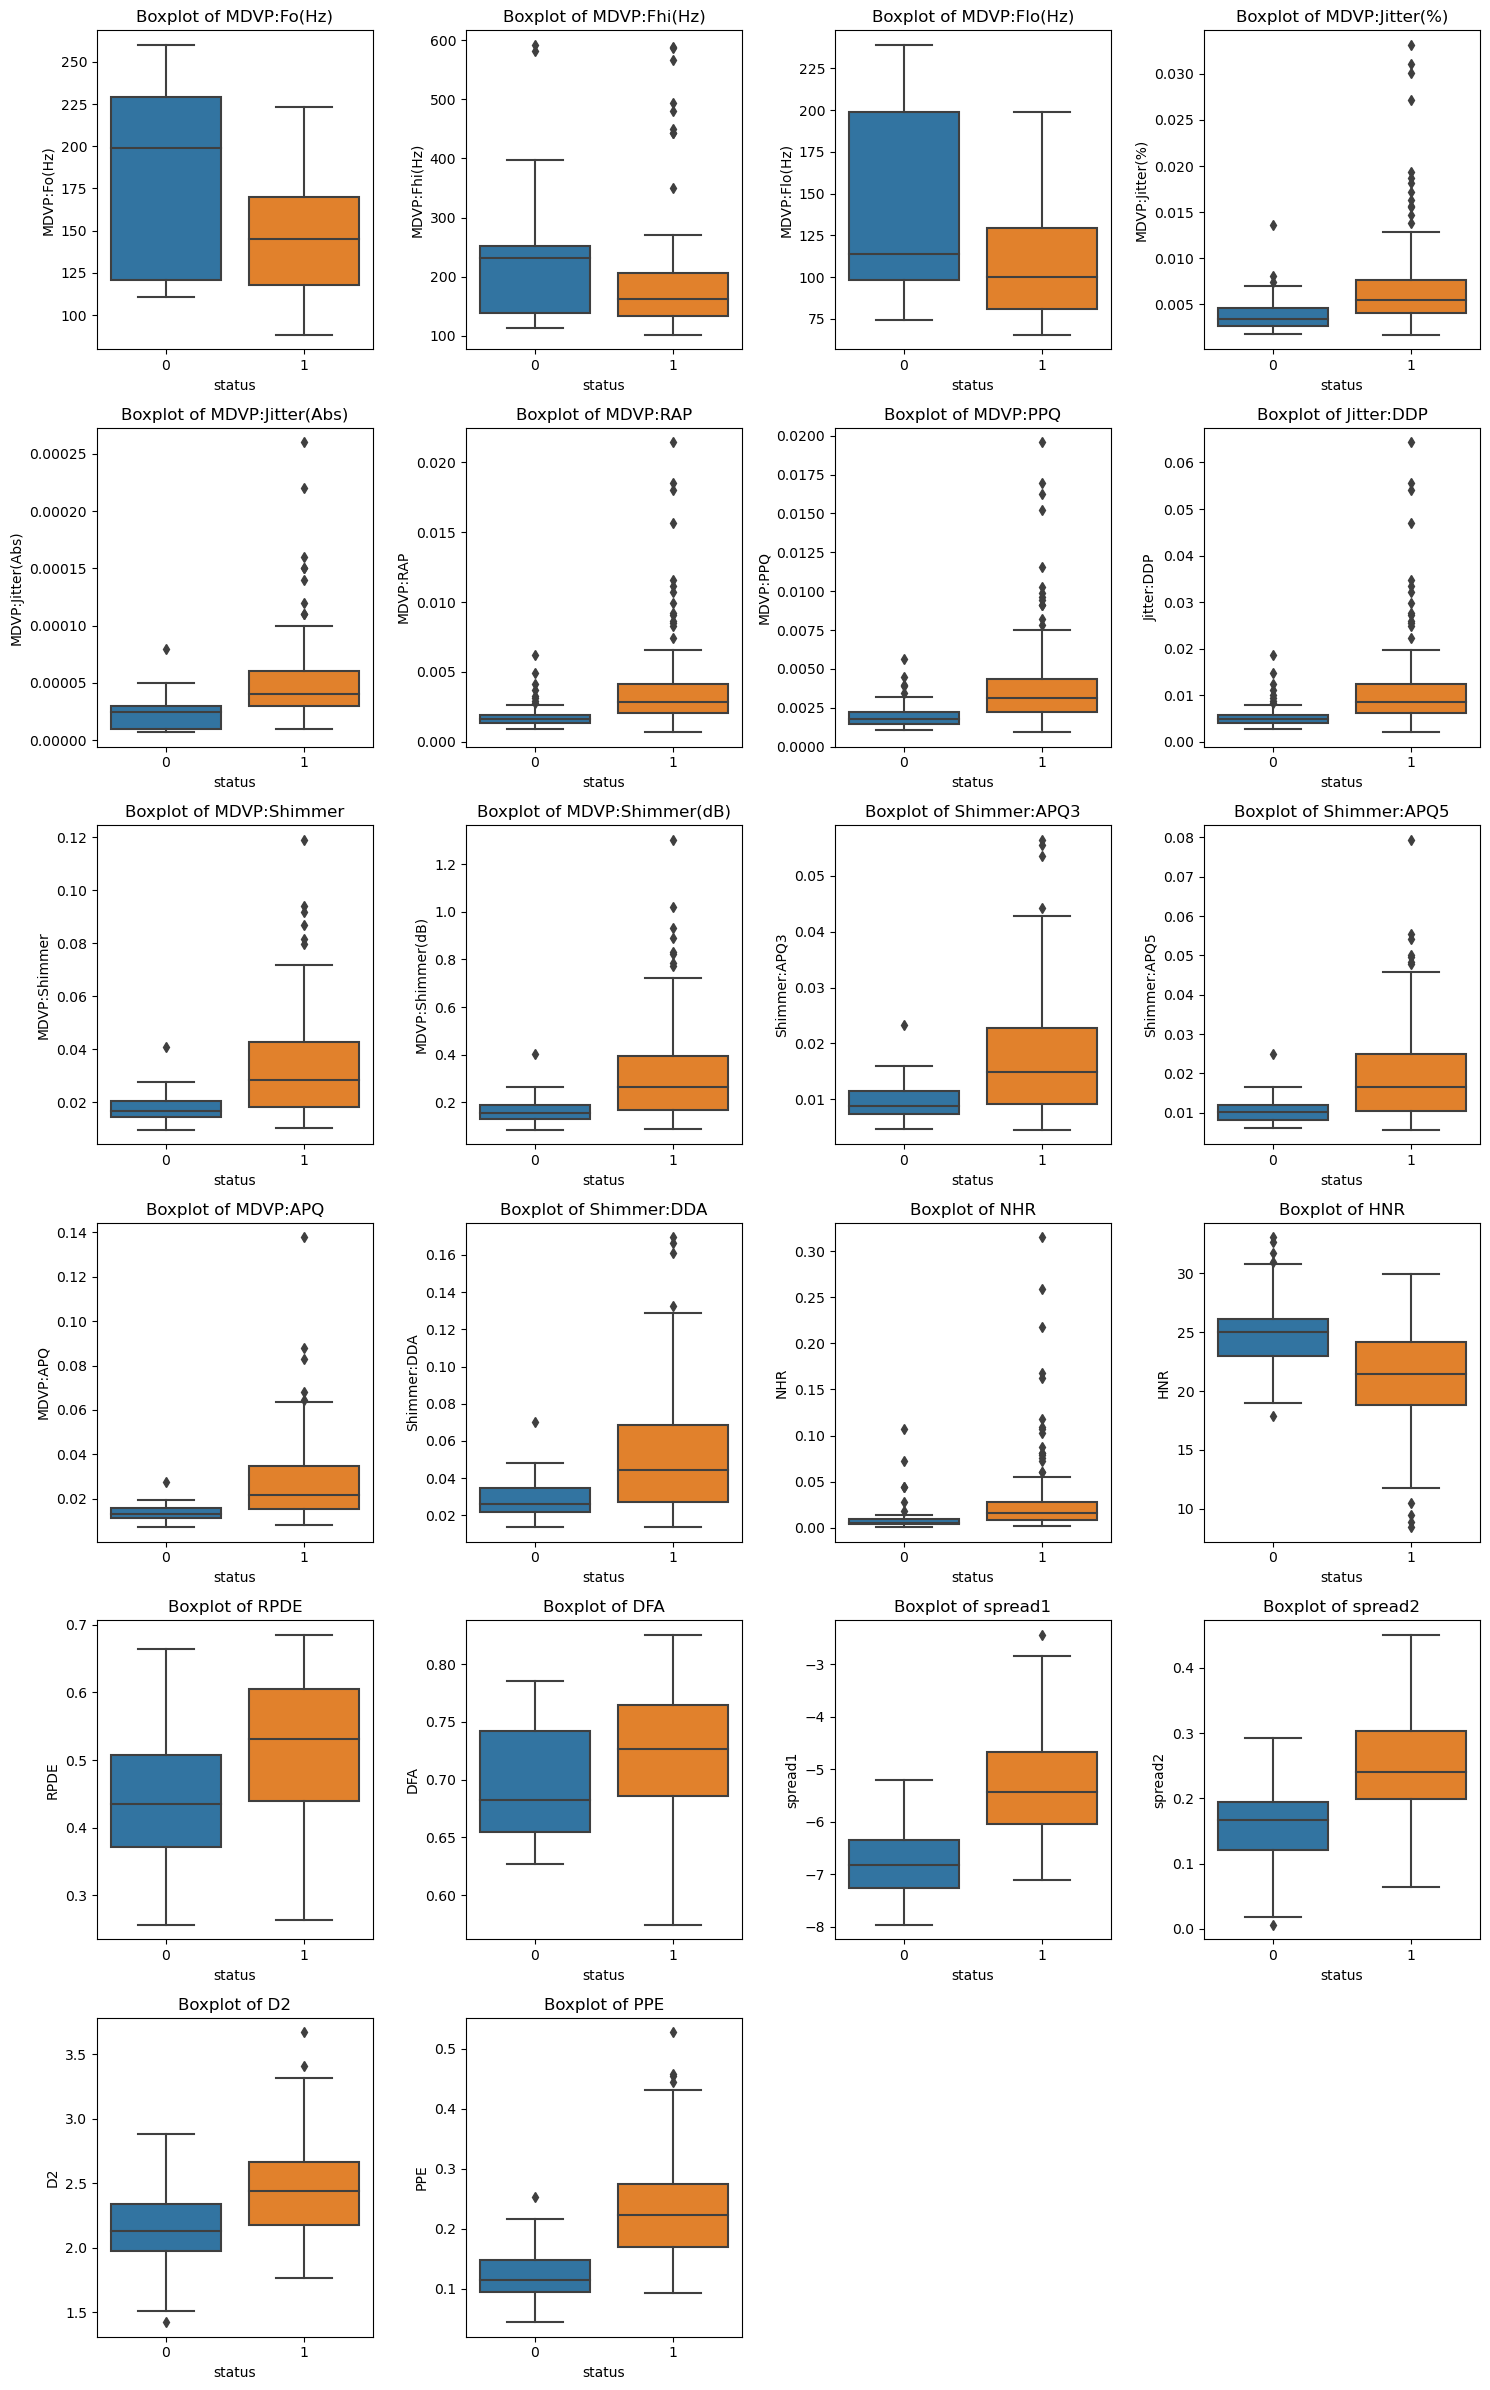

In [144]:
features= X.columns

num_features = len(features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

for i, feature in enumerate(features):
    row_index = i // num_cols 
    col_index = i % num_cols   
    sns.boxplot(x=data['status'], y=data[feature], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Boxplot of {feature}')


for i in range(num_features, num_rows*num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()


<AxesSubplot:ylabel='status'>

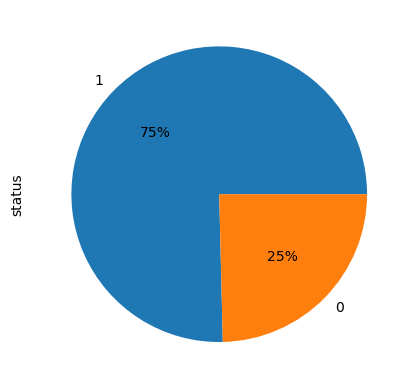

In [145]:
data['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

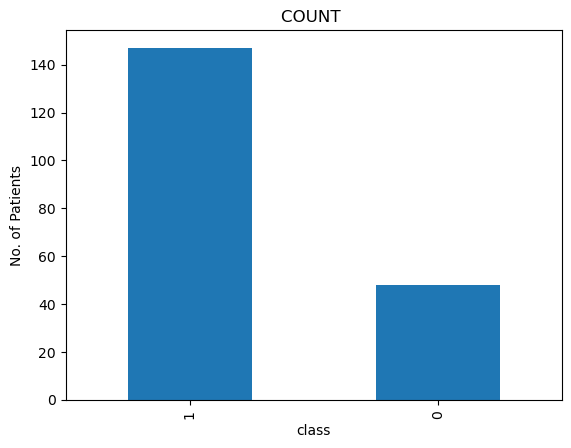

<Figure size 640x100 with 0 Axes>

In [146]:
count=data['status'].value_counts()
count.plot(kind = "bar")
plt.title("COUNT ")
plt.xlabel("class")
plt.ylabel("No. of Patients")
plt.figure().set_figheight(1)
plt.show()

In [147]:
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [148]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
Sample = RandomOverSampler(sampling_strategy = 0.6)
X_sam,Y_sam=Sample.fit_resample(X,y)

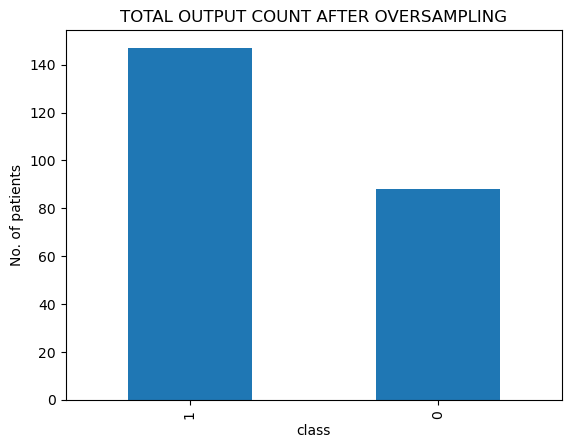

<Figure size 640x100 with 0 Axes>

In [149]:
count = pd.value_counts(Y_sam,  sort = True)

count.plot(kind = "bar")
plt.title("TOTAL OUTPUT COUNT AFTER OVERSAMPLING")
plt.xlabel("class")
plt.ylabel("No. of patients")
plt.figure().set_figheight(1)
plt.show()

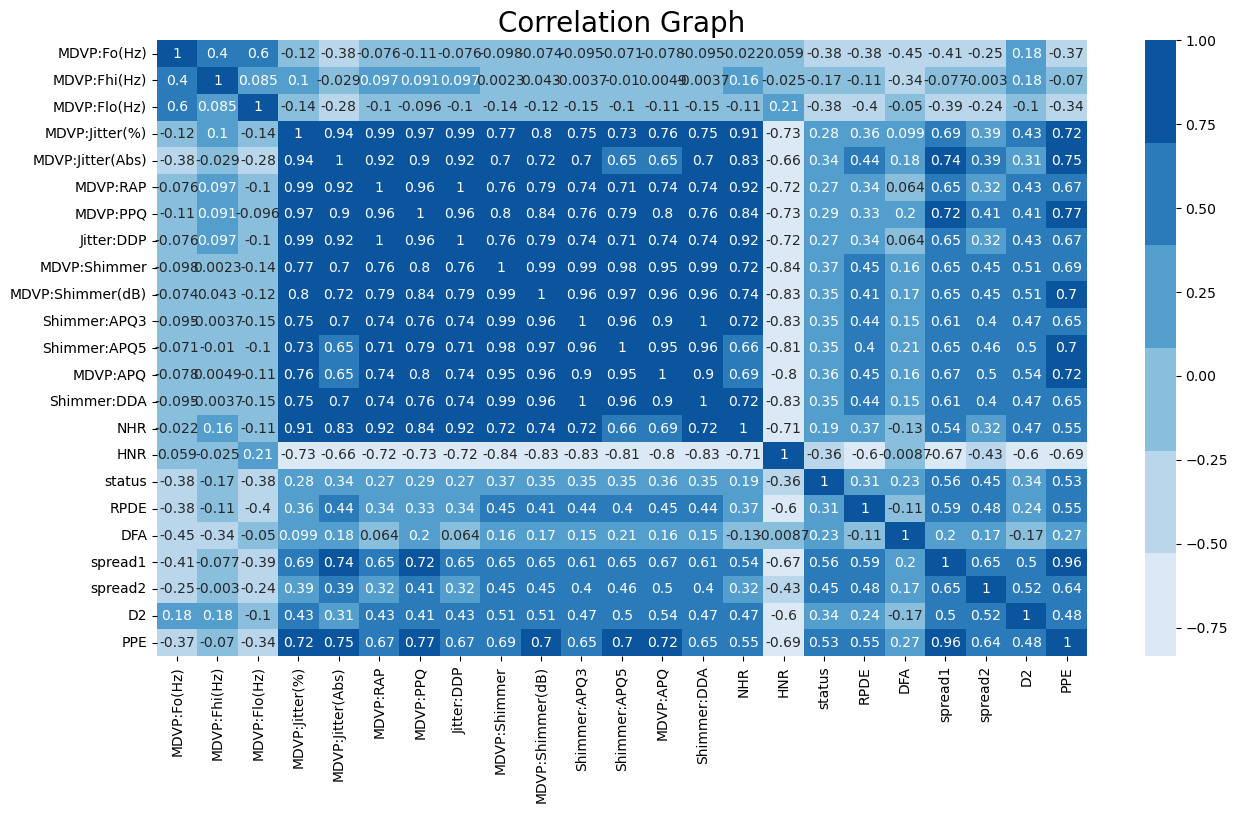

In [150]:
plt.figure(figsize=[15, 8], dpi=100)
plt.title("Correlation Graph", fontsize=20)

numerical=data.drop('name', axis=1)

cmap = sns.color_palette("Blues")

sns.heatmap(numerical.corr(), annot=True, cmap=cmap)

plt.show()


In [151]:
X_train , X_test, y_train , y_test = train_test_split(X_sam,Y_sam,test_size=0.2,random_state=42)

In [152]:
X_train.shape,X_test.shape

((188, 22), (47, 22))

In [153]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

#  Metrics
training_accuracy = {}
cross_validation_score_train = {}
precision_train = {}
recall_train = {}
f1_train = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    training_accuracy[name] = model.score(X_train_scaled, y_train)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    cross_validation_score_train[name] = cv_scores.mean()

    y_pred = model.predict(X_train_scaled)
    precision_train[name] = precision_score(y_train, y_pred)

    recall_train[name] = recall_score(y_train, y_pred)


    f1_train[name] = f1_score(y_train, y_pred)


print("*"*50)
print("Training Set")
print("*"*50)
print("")

for name in models.keys():
    print(f"Model: {name}")
    print(f"Training Accuracy Score: {training_accuracy[name]}")
    print(f"Cross Validation Score: {cross_validation_score_train[name]}")
    print(f"Precision Score: {precision_train[name]}")
    print(f"Recall Score: {recall_train[name]}")
    print(f"F1-Score Score: {f1_train[name]}")
    print("-" * 50)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

**************************************************
Training Set
**************************************************

Model: Logistic Regression
Training Accuracy Score: 0.7872340425531915
Cross Validation Score: 0.7819345661450925
Precision Score: 0.7938931297709924
Recall Score: 0.8888888888888888
F1-Score Score: 0.8387096774193549
--------------------------------------------------
Model: SVM
Training Accuracy Score: 0.8670212765957447
Cross Validation Score: 0.8509246088193457
Precision Score: 0.8285714285714286
Recall Score: 0.9914529914529915
F1-Score Score: 0.9027237354085603
--------------------------------------------------
Model: Decision Trees
Training Accuracy Score: 1.0
Cross Validation Score: 0.89900426742532
Precision Score: 1.0
Recall Score: 1.0
F1-Score Score: 1.0
--------------------------------------------------
Model: Random Forest
Training Accuracy Score: 1.0
Cross Validation Score: 0.9149359886201992
Precision Score: 1.0
Recall Score: 1.0
F1-Score Score: 1.0
--------

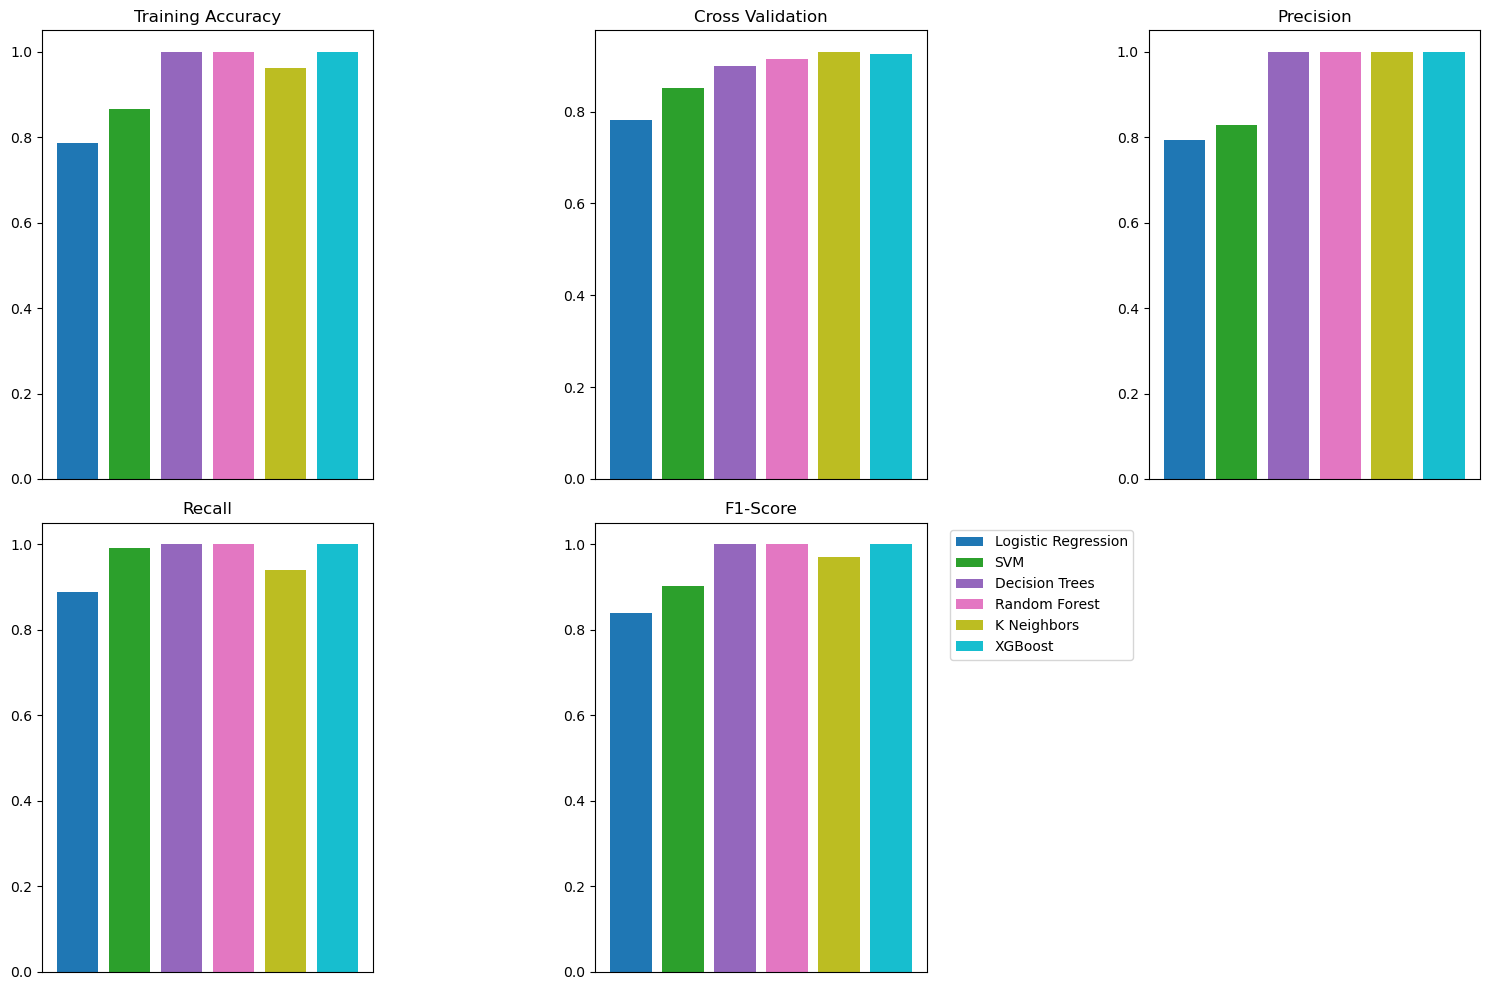

In [155]:
metric_names = ["Training Accuracy", "Cross Validation", "Precision", "Recall", "F1-Score"]
scores = [training_accuracy, cross_validation_score_train, precision_train, recall_train, f1_train]


colors = plt.cm.tab10(np.linspace(0, 1, len(models))) 


plt.figure(figsize=(15, 10))

for i, metric in enumerate(metric_names):
    plt.subplot(2, 3, i+1)
    for j, model_name in enumerate(models.keys()):
        plt.bar(model_name, scores[i][model_name], color=colors[j], label=model_name)
    plt.title(metric)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [156]:

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}



testing_accuracy = {}
cross_validation_score_test = {}
precision_test = {}
recall_test = {}
f1_test = {}


for name, model in models.items():

    model.fit(X_test_scaled, y_test)

    testing_accuracy[name] = model.score(X_test_scaled, y_test)

    cv_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5)
    cross_validation_score_test[name] = cv_scores_test.mean()

    y_pred = model.predict(X_test_scaled)
    precision_test[name] = precision_score(y_test, y_pred)

    recall_test[name] = recall_score(y_test, y_pred)

    f1_test[name] = f1_score(y_test, y_pred)

print("*"*50)
print("Testing Set")
print("*"*50)
print("")

for name in models.keys():
    print(f"Model: {name}")
    print(f"Testing Accuracy Score: {testing_accuracy[name]}")
    print(f"Cross Validation Score: {cross_validation_score_test[name]}")
    print(f"Precision Score: {precision_test[name]}")
    print(f"Recall Score: {recall_test[name]}")
    print(f"F1-Score Score: {f1_test[name]}")
    print("-" * 50)


**************************************************
Testing Set
**************************************************

Model: Logistic Regression
Testing Accuracy Score: 0.8723404255319149
Cross Validation Score: 0.8311111111111111
Precision Score: 0.8529411764705882
Recall Score: 0.9666666666666667
F1-Score Score: 0.90625
--------------------------------------------------
Model: SVM
Testing Accuracy Score: 0.9361702127659575
Cross Validation Score: 0.9133333333333333
Precision Score: 0.9655172413793104
Recall Score: 0.9333333333333333
F1-Score Score: 0.9491525423728815
--------------------------------------------------
Model: Decision Trees
Testing Accuracy Score: 1.0
Cross Validation Score: 0.8311111111111111
Precision Score: 1.0
Recall Score: 1.0
F1-Score Score: 1.0
--------------------------------------------------
Model: Random Forest
Testing Accuracy Score: 1.0
Cross Validation Score: 0.8911111111111112
Precision Score: 1.0
Recall Score: 1.0
F1-Score Score: 1.0
----------------------

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

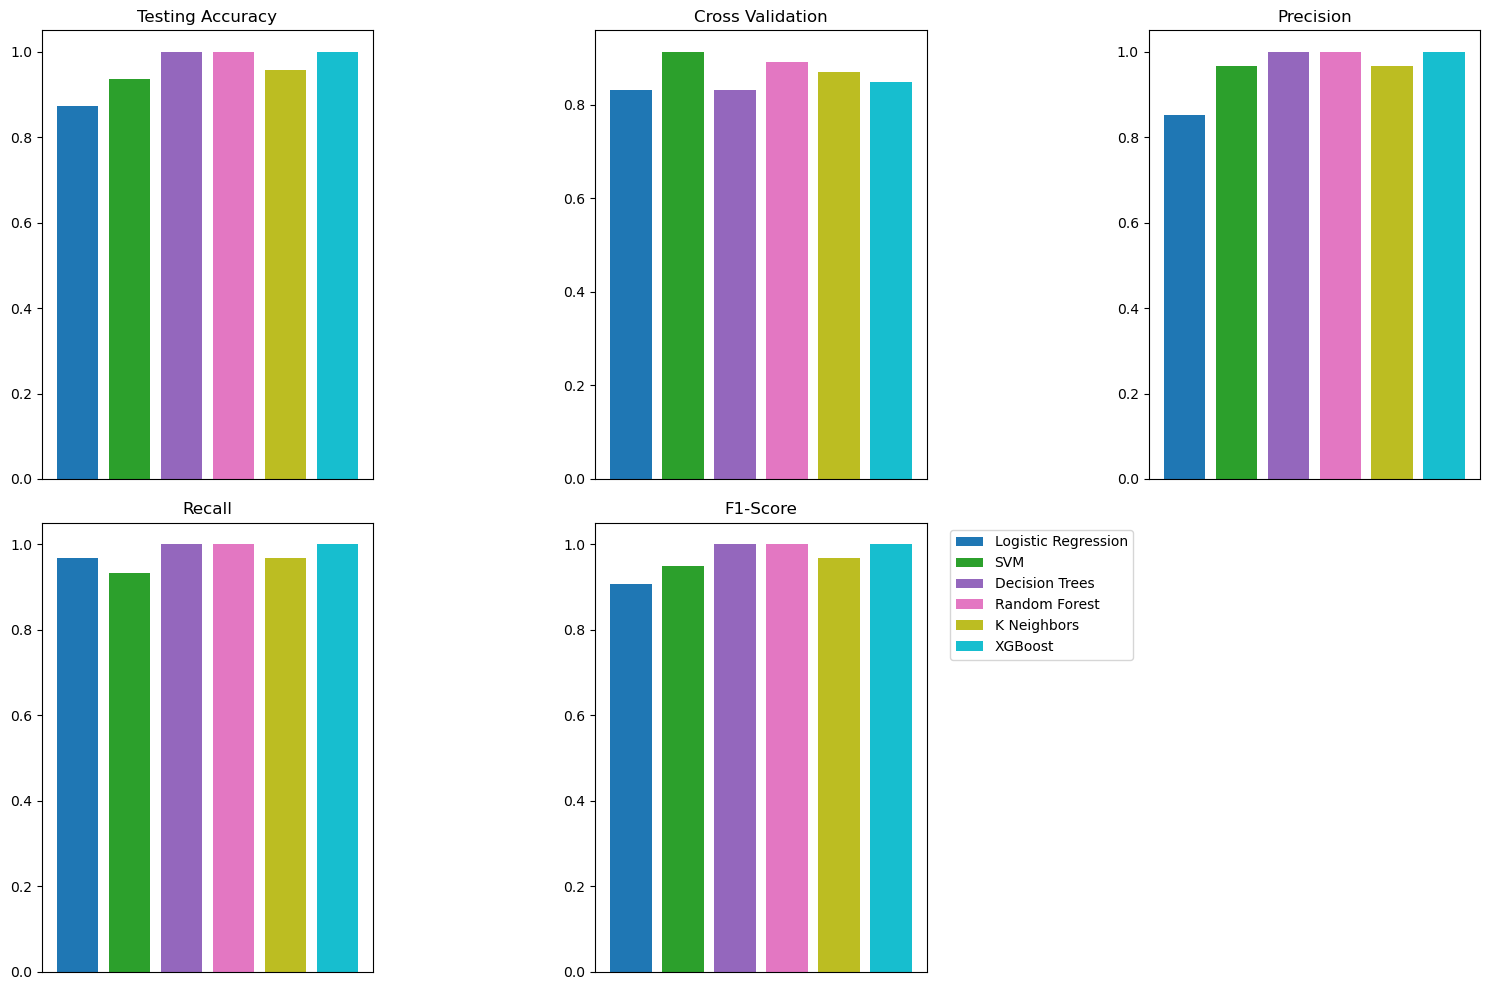

In [157]:
metric_names = ["Testing Accuracy", "Cross Validation", "Precision", "Recall", "F1-Score"]
scores = [testing_accuracy, cross_validation_score_test, precision_test, recall_test, f1_test]

colors = plt.cm.tab10(np.linspace(0, 1, len(models)))  


plt.figure(figsize=(15, 10))

for i, metric in enumerate(metric_names):
    plt.subplot(2, 3, i+1)
    for j, model_name in enumerate(models.keys()):
        plt.bar(model_name, scores[i][model_name], color=colors[j], label=model_name)
    plt.title(metric)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


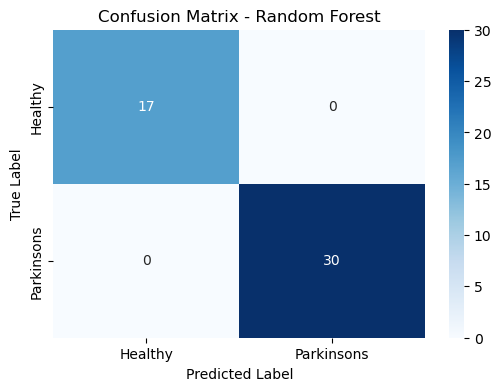


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


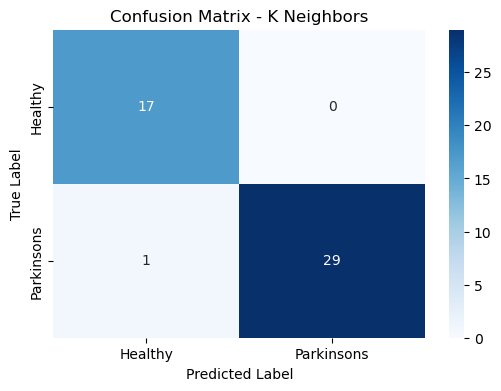


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.97      0.98        30

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



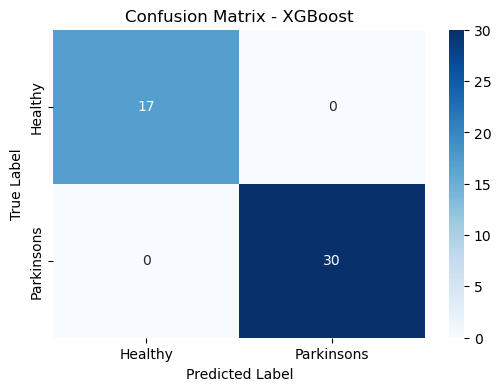


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



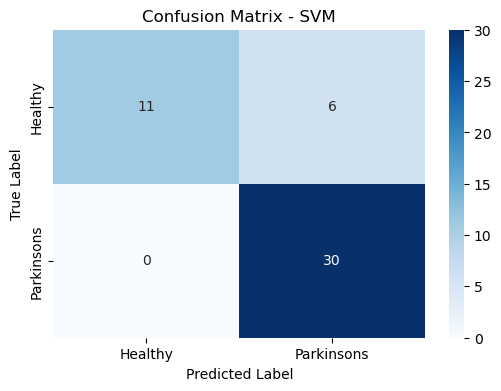


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.83      1.00      0.91        30

    accuracy                           0.87        47
   macro avg       0.92      0.82      0.85        47
weighted avg       0.89      0.87      0.86        47



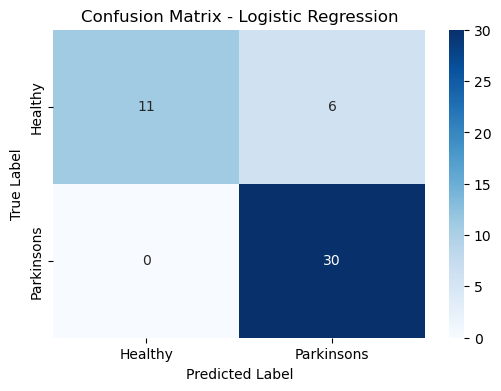


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.83      1.00      0.91        30

    accuracy                           0.87        47
   macro avg       0.92      0.82      0.85        47
weighted avg       0.89      0.87      0.86        47



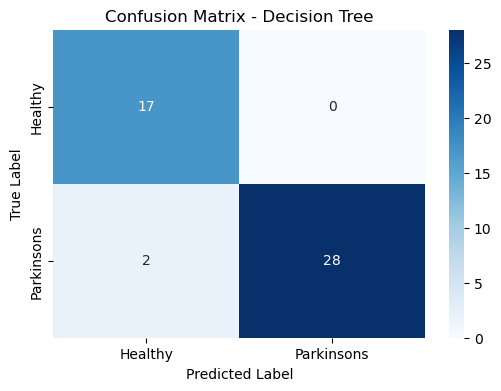


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.93      0.97        30

    accuracy                           0.96        47
   macro avg       0.95      0.97      0.95        47
weighted avg       0.96      0.96      0.96        47



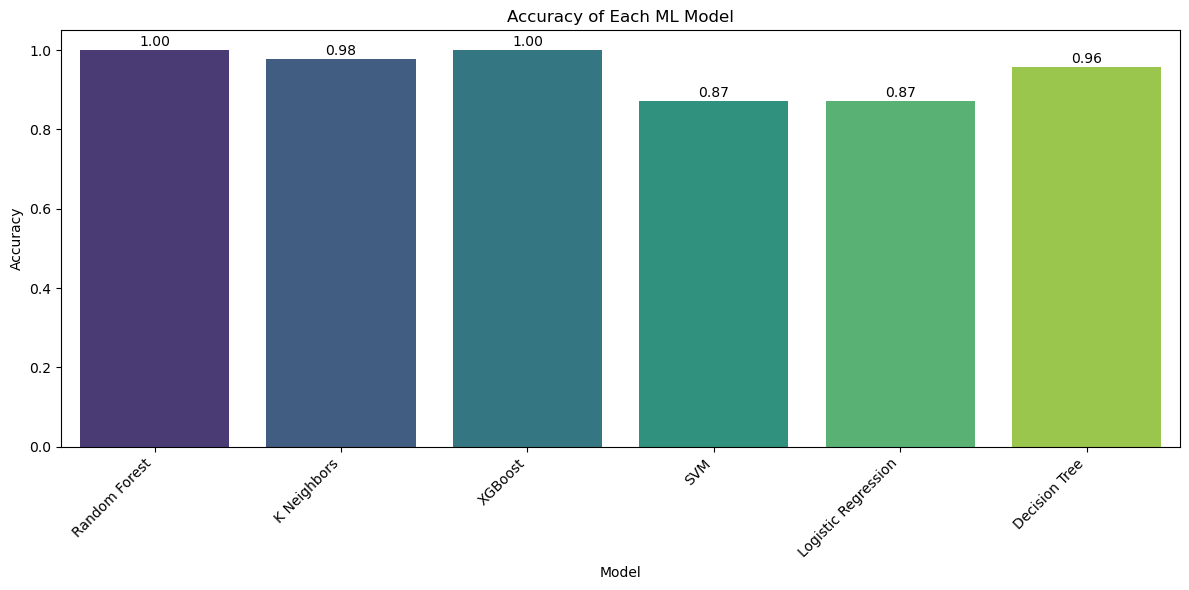

In [158]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


chosen_models = {
    "Random Forest": RandomForestClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier()
}

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


model_names = []
model_accuracies = []


for name, model in chosen_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plot_confusion_matrix(y_test, y_pred, name)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    model_names.append(name)
    model_accuracies.append(accuracy)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=model_names, y=model_accuracies, palette='viridis')
plt.title('Accuracy of Each ML Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')


for index, value in enumerate(model_accuracies):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center')

plt.tight_layout()  
plt.show()


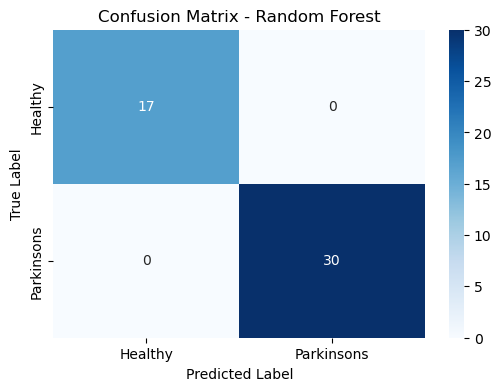


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



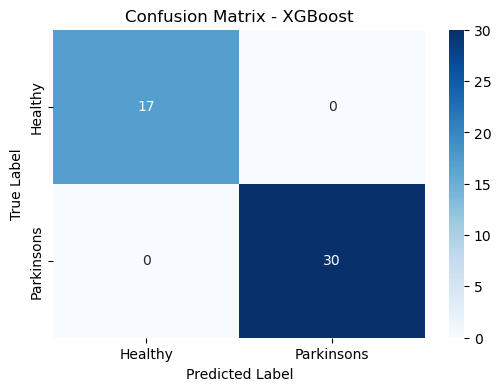


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


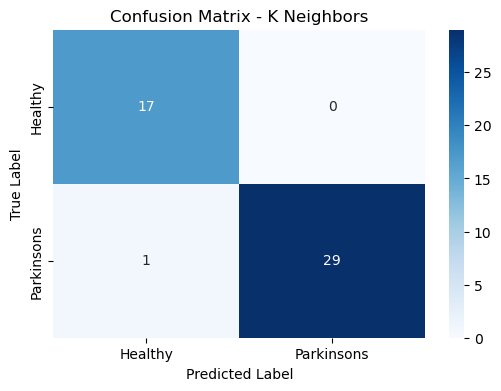


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.97      0.98        30

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



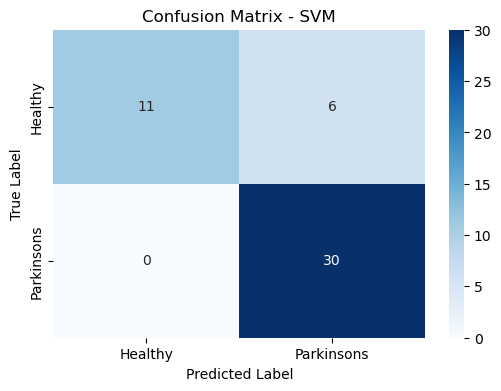


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.83      1.00      0.91        30

    accuracy                           0.87        47
   macro avg       0.92      0.82      0.85        47
weighted avg       0.89      0.87      0.86        47



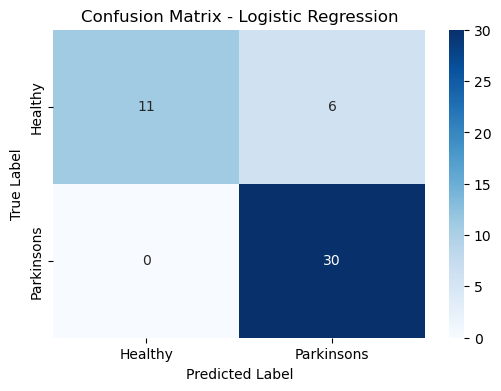


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.83      1.00      0.91        30

    accuracy                           0.87        47
   macro avg       0.92      0.82      0.85        47
weighted avg       0.89      0.87      0.86        47



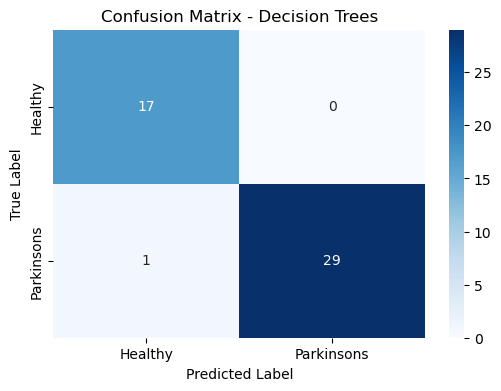


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.97      0.98        30

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



In [159]:
chosen_models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Decision Trees": DecisionTreeClassifier(),
}



def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

for name, model in chosen_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    plot_confusion_matrix(y_test, y_pred, name)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


### HyperParameter Tuning

Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
cross_validation_score: 0.8911111111111112

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



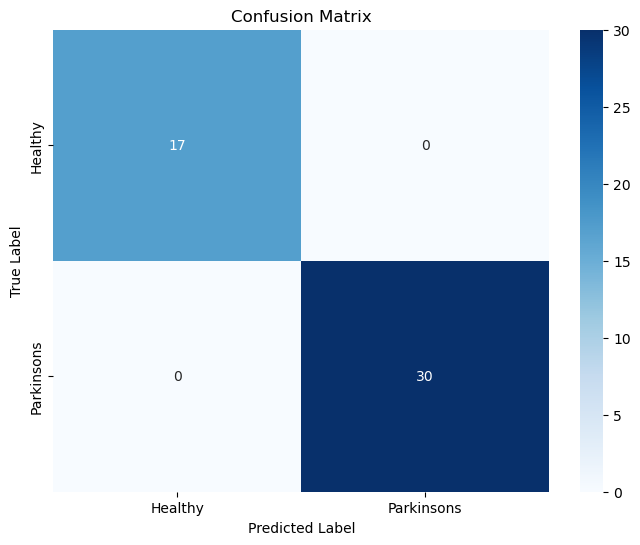

In [160]:

rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_rf_classifier = grid_search.best_estimator_

y_pred = best_rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

cv_scores_test = cross_val_score(best_rf_classifier, X_test_scaled, y_test, cv=5)
cross_validation_score = cv_scores_test.mean()


print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("cross_validation_score:", cross_validation_score)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


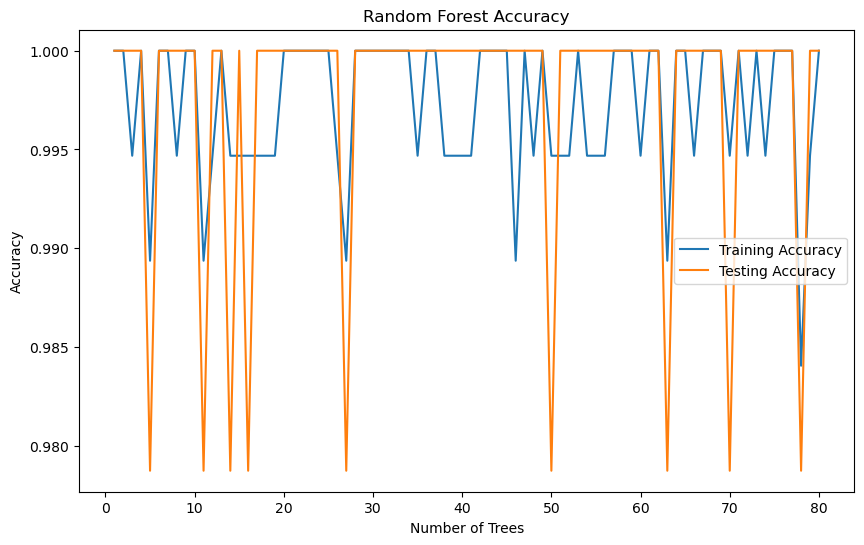

In [161]:
train_accuracy = []
test_accuracy = []

for i in range(1, 81):
    best_rf_classifier.fit(X_train_scaled, y_train)
    train_accuracy.append(best_rf_classifier.score(X_train_scaled, y_train))
    test_accuracy.append(best_rf_classifier.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 81), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 81), test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.legend()
plt.show()


Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
cross_validation_score: 0.828888888888889

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        30

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



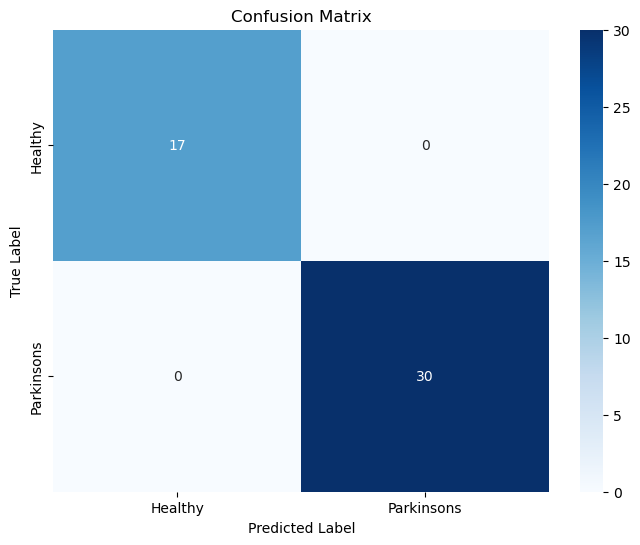

In [162]:
xgb_classifier = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.2]
}


grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


best_xgb_classifier = grid_search.best_estimator_

y_pred = best_xgb_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores_test = cross_val_score(best_xgb_classifier, X_test_scaled, y_test, cv=5)
cross_validation_score = cv_scores_test.mean()


print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("cross_validation_score:", cross_validation_score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


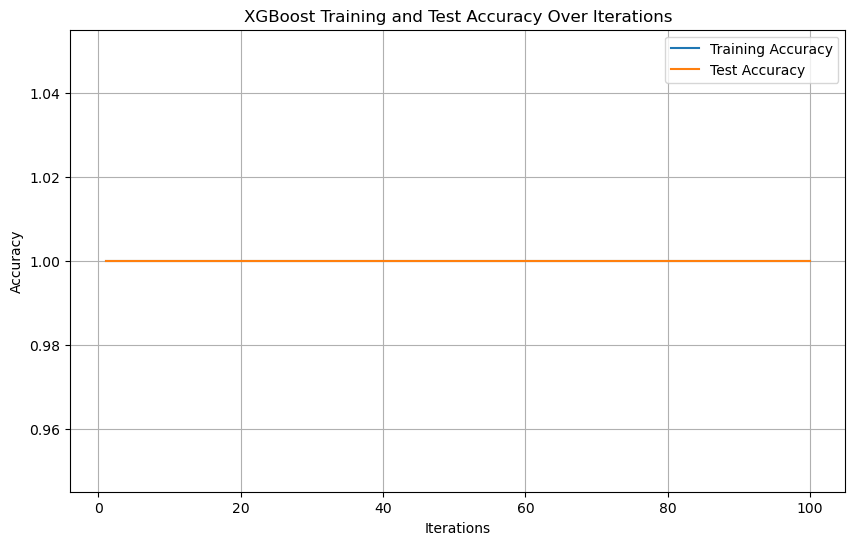

In [163]:
n_iterations = 100

train_accuracy = []
test_accuracy = []



for i in range(1, n_iterations+1):
    best_xgb_classifier.fit(X_train_scaled, y_train)
    train_accuracy.append(best_xgb_classifier.score(X_train_scaled, y_train))
    test_accuracy.append(best_xgb_classifier.score(X_test_scaled, y_test))



plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, n_iterations+1), test_accuracy, label='Test Accuracy')
plt.title('XGBoost Training and Test Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

Evaluation Metrics:
Accuracy: 0.9787234042553191
Precision: 0.9799054373522459
Recall: 0.9787234042553191
F1-Score: 0.9788470454896707
cross_validation_score: 0.888888888888889

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.97      0.98        30

    accuracy                           0.98        47
   macro avg       0.97      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



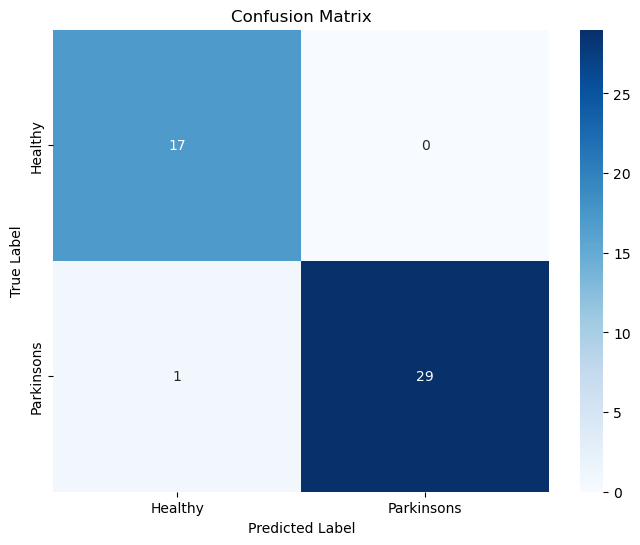

In [164]:
knn_classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  
}


grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


best_knn_classifier = grid_search.best_estimator_


y_pred = best_knn_classifier.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

cv_scores_test = cross_val_score(best_knn_classifier, X_test_scaled, y_test, cv=5)
cross_validation_score = cv_scores_test.mean()



print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("cross_validation_score:", cross_validation_score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

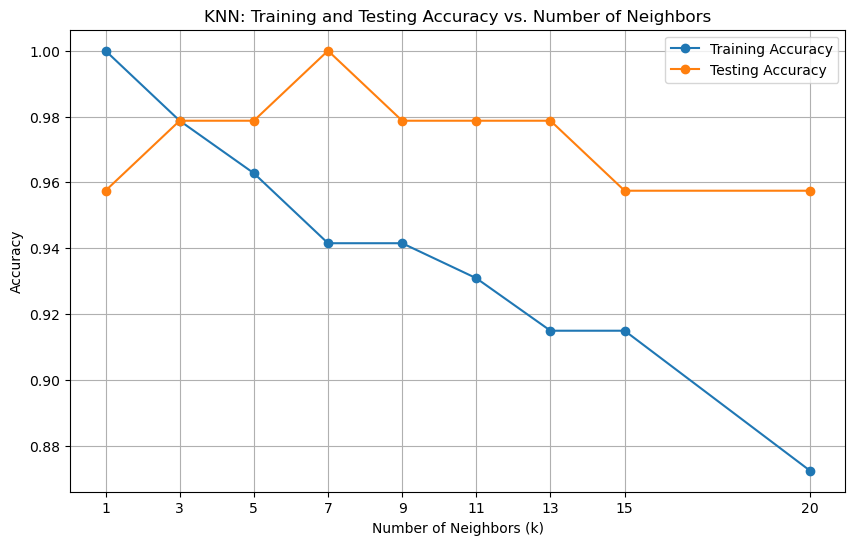

In [165]:
neighbors_range = [1,3, 5, 7, 9, 11, 13, 15,20]  

train_accuracy = []
test_accuracy = []

for k in neighbors_range:
    
    best_knn_classifier = KNeighborsClassifier(n_neighbors=k)   
    best_knn_classifier.fit(X_train_scaled, y_train)

    train_accuracy.append(best_knn_classifier.score(X_train_scaled, y_train))
    test_accuracy.append(best_knn_classifier.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(neighbors_range, test_accuracy, label='Testing Accuracy', marker='o')
plt.title('KNN: Training and Testing Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.legend()
plt.grid(True)
plt.show()
